# Introduction
The goal of this project is to analyse coffee sale data from a vending machine, particularly around purchasing patterns, sales trends and customer preferences related to coffee products.

This project will scope, analyse, prepare, plot data, and seek to explain the findings from the analysis.

This project has sought to answer:

- Payment Method Analysis - *Which payment method is more common?*
- Coffee Type Analysis - *Which type of coffee is the best seller?*
- Time Series Analysis - *What is the pattern of coffee sale throughout the day?*
- Earning Analysis - *In which month most amount of money is earned?*
- Price Analysis - *Is there any pattern between the coffee price and the number sold?*

# Data:

This dataset contains detailed records of coffee sales from a vending machine.

**Data Collection Period:**

The dataset spans from 1 March 2024 to 20 October 2024, capturing daily transaction data.


**Data Source:**

`index.csv` was provided by Yaroslav Isaienkov on [Kaggle.com](https://www.kaggle.com/datasets/ihelon/coffee-sales?resource=download).

# Analysis:
In this project, descriptive statistics and data visualisation techniques will be employed to understand the data better. Some of the key metrics that will be computed include: 

1. Counts
2. Distributions
3. Time series exploratory data analysis

## Loading the Data

The `index.csv` dataset contains information on the coffee sale. The columns in the data set include:

- **date** - Date of purchasing
- **datetime** - Datetime of purchasing
- **cash_type** - Cash or card purchasing
- **card** - Anonymous card number
- **money** - Amount of money in Ukrainian hryvnias
- **coffee_name** - coffee type

In [16]:
import pandas as pd

coffee = pd.read_csv("index.csv")

coffee.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


## Exploring the Data
Understanding the data type, the descriptive statistics and checking for any nan values or outliers.

In [17]:
coffee.info()
# Data types are as expected based on the data dictionary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2026 non-null   object 
 1   datetime     2026 non-null   object 
 2   cash_type    2026 non-null   object 
 3   card         1937 non-null   object 
 4   money        2026 non-null   float64
 5   coffee_name  2026 non-null   object 
dtypes: float64(1), object(5)
memory usage: 95.1+ KB


**Descriptive Statistics**

In [18]:
coffee.describe(include = "all")
# The minimum (23.0) and maximum (40.0) values of the 'money' column seem reasonable hence no outliers are observed.

,date,datetime,cash_type,card,money,coffee_name
count,2026,2026,2026,1937,2026.000000,2026
unique,231,2026,2,792,NaN,8
top,2024-10-11,2024-03-01 10:15:50.520,card,ANON-0000-0000-0012,NaN,Americano with Milk
freq,26,1,1937,110,NaN,492
mean,NaN,NaN,NaN,NaN,31.670424,NaN
std,NaN,NaN,NaN,NaN,5.212254,NaN
min,NaN,NaN,NaN,NaN,18.120000,NaN
25%,NaN,NaN,NaN,NaN,27.920000,NaN
50%,NaN,NaN,NaN,NaN,32.820000,NaN
75%,NaN,NaN,NaN,NaN,35.760000,NaN


**Missing Values**

All the nan values are due to the purchase with cash, hence the missing values are classified as "Structurally Missing Data" and could be ignored.

In [32]:
print(coffee.isnull().sum())

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
month           0
hour            0
dtype: int64


In [20]:
print(coffee.cash_type.value_counts())

cash_type
card    1937
cash      89
Name: count, dtype: int64


In [21]:
# To confirm the suspicion of the missing values being due to the usage of cash payment

nan_list = coffee[coffee.card.isnull()]
(nan_list["cash_type"] == "cash").sum()

89

## Analysing the Data

**Payment Method Analysis**

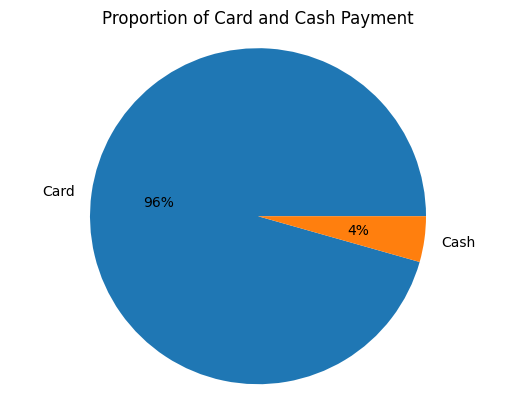

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

payment_method = coffee.groupby("cash_type").datetime.count()

plt.pie(payment_method, labels = ["Card", "Cash"], autopct = "%1.0f%%")
plt.title("Proportion of Card and Cash Payment")
plt.axis("equal")
plt.show()

**Coffee Type Analysis**

In [23]:
print(f"number of coffee types:{coffee.coffee_name.nunique()}")
print(f"coffee types:{coffee.coffee_name.unique()}")

number of coffee types:8
coffee types:['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']


In [24]:
count_by_coffee = coffee.groupby("coffee_name").size().sort_values(ascending = False)
count_by_coffee

coffee_name
Americano with Milk    492
Latte                  473
Cappuccino             297
Americano              270
Cortado                202
Hot Chocolate          136
Espresso                81
Cocoa                   75
dtype: int64

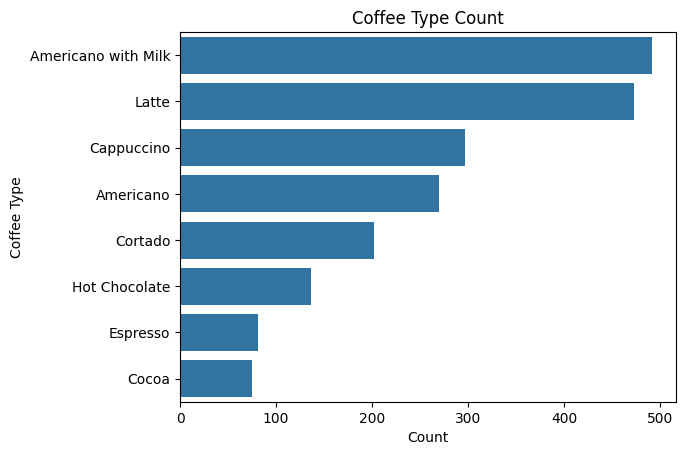

In [25]:
# To visualise the above information in a bar chart

count_by_coffee = count_by_coffee.sort_values(ascending = False)

sns.barplot(x = count_by_coffee.values, y = range(len(count_by_coffee)), orient = "h")
plt.ylabel("Coffee Type")
plt.xlabel("Count")
plt.title("Coffee Type Count")

ax = plt.subplot()
ax.set_yticks(range(len(count_by_coffee)))
ax.set_yticklabels(count_by_coffee.index)

plt.show()

**Time Series Analysis**

In [26]:
# Create a new column for the month and the purchase hour respectively
date_split = coffee["date"].str.split("-")
coffee["month"] = date_split.str.get(1)

hour_split = coffee["datetime"].str.split(" ")
coffee["hour"] = hour_split.str.get(1).str[:2]

print(coffee.head(5))

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name month hour  
0          Latte    03   10  
1  Hot Chocolate    03   12  
2  Hot Chocolate    03   12  
3      Americano    03   13  
4          Latte    03   13  


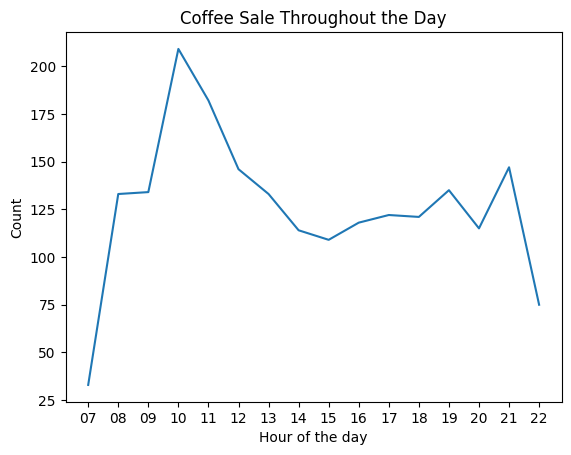

In [27]:
count_by_hour = coffee.groupby("hour").coffee_name.count()

plt.plot(count_by_hour.index, count_by_hour.values)
plt.xlabel("Hour of the day")
plt.ylabel("Count")
plt.title("Coffee Sale Throughout the Day")

plt.show()

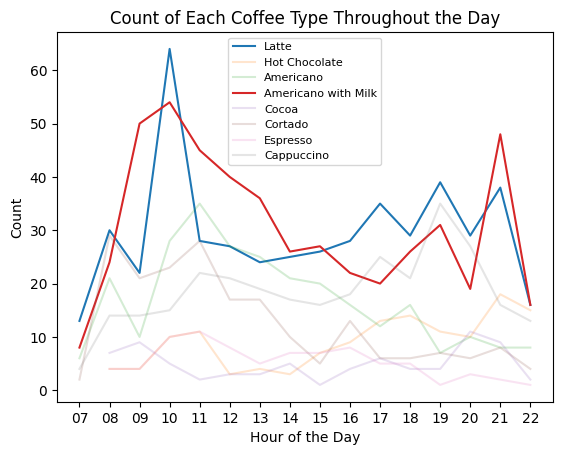

In [45]:
coffee_list = coffee.coffee_name.unique().tolist()

for i in coffee_list:
    hours = coffee[coffee["coffee_name"] == i]
    if i == "Latte" or i == "Americano with Milk":
        plt.plot(hours.groupby("hour").datetime.count().index, hours.groupby("hour").datetime.count().values, label = i)
    else:
        plt.plot(hours.groupby("hour").datetime.count().index, hours.groupby("hour").datetime.count().values, label = i, alpha = 0.2)

plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.title("Count of Each Coffee Type Throughout the Day")
plt.legend(prop={'size':8})

plt.show()

In [29]:
coffee.groupby("month").coffee_name.count()
# Not enough data to observe for any patterns for different seasons

month
03    206
04    196
05    267
06    227
07    237
08    272
09    344
10    277
Name: coffee_name, dtype: int64

**Earning Analysis**

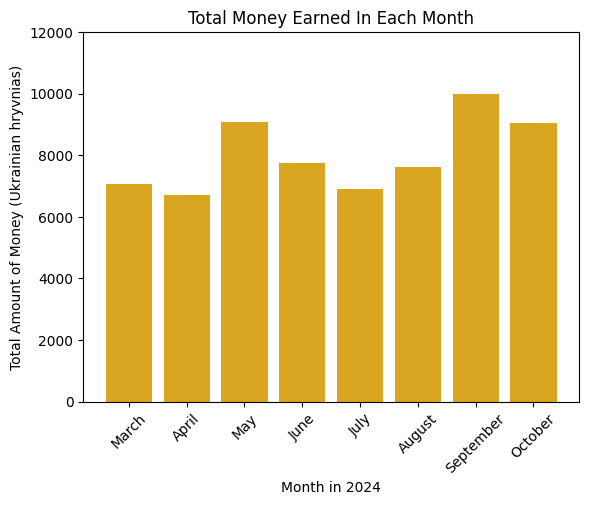

<Figure size 640x480 with 0 Axes>

In [46]:
# Money earned in each month
coffee.groupby("month").money.sum()
plt.bar(x = coffee.groupby("month").money.sum().index, height = coffee.groupby("month").money.sum().values, color = "goldenrod")
plt.title("Total Money Earned In Each Month")
plt.xlabel("Month in 2024")
plt.ylabel("Total Amount of Money (Ukrainian hryvnias)")
plt.xticks(rotation=45, ha='center')
plt.ylim(0, 12000)

ax = plt.subplot()
ax.set_xticks(coffee.groupby("month").money.sum().index)
ax.set_xticklabels(["March", "April", "May", "June", "July", "August", "September", "October"])

plt.show()
plt.clf()

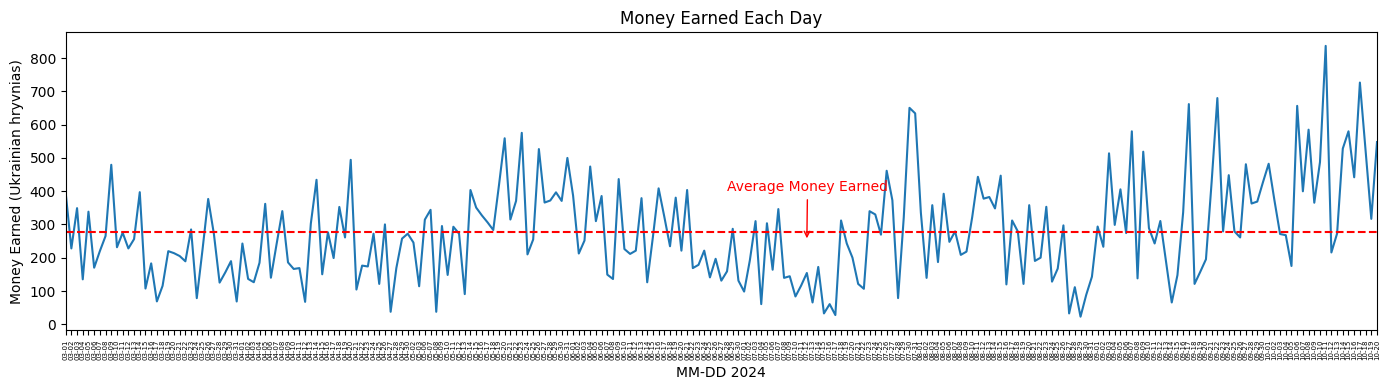

<Figure size 640x480 with 0 Axes>

In [38]:
# Money earned in each day
plt.figure(figsize = (14,4), tight_layout = True)
plt.plot(coffee.groupby("date").money.sum().index, coffee.groupby("date").money.sum().values)
plt.xlabel("MM-DD 2024")
plt.ylabel("Money Earned (Ukrainian hryvnias)")
plt.title("Money Earned Each Day")
plt.axhline(y = coffee.groupby("date").money.sum().mean(), color = "red", linestyle = "--")
plt.annotate("Average Money Earned", (130, 250), color = "red", arrowprops = dict(arrowstyle = "->", color = "red"), xytext=(116, 400))

ax = plt.subplot()
ax.set_xticks(coffee.groupby("date").money.sum().index)
ax.set_xticklabels((coffee.groupby("date").money.sum().index).str[5:], rotation = 90, size = 5)
ax.margins(x = 0)

plt.show()
plt.clf()

**Price Analysis**

In [47]:
avg_price_by_coffee = coffee.groupby("coffee_name").money.mean().sort_values(ascending = False)
avg_price_by_coffee

coffee_name
Hot Chocolate          36.408088
Cappuccino             36.158586
Cocoa                  35.606400
Latte                  35.552770
Americano with Milk    30.535772
Americano              26.172519
Cortado                25.734950
Espresso               20.964198
Name: money, dtype: float64

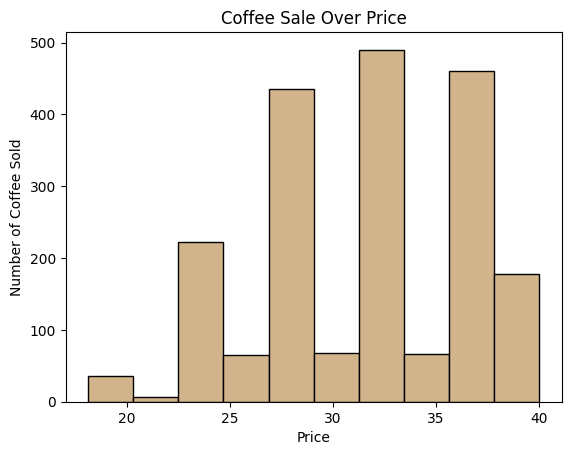

In [48]:
plt.hist(coffee.money, edgecolor = "black", bins = 10, color = "tan")
plt.xlabel("Price")
plt.ylabel("Number of Coffee Sold")
plt.title("Coffee Sale Over Price")

plt.show()

# Evaluation
**Payment Method Analysis**

With the majority (96%) of the purchases being made with cards, the maintenance of the card machine would be crucial to support the coffee sale.

**Coffee Type Analysis**

Americano with milk is the best seller type of coffee, followed by latte then cappuccino. 

**Time Series Analysis**

Overall there are two peak sale periods, one in the morning (9am to 12pm) and one in the evening (6pm to 9pm).

Americano with milk is the most popular throughout the morning (9am to 1pm) with latte's sale peaking from 10am to 11am. In the evening, the best seller is latte from 6pm to 8pm and americano with milk from 8pm to 10pm. 

The implication of these results suggested a higher demand for the two types of coffee (americano with milk and latte) hence constant restocking would be necessary.

**Earning Analysis**

Most money from the coffee sale is earned in September, within the period between March and October 2024. The amount of money earned is above average from mid-May to mid-June, from late July to mid-August, and from September onwards. 

**Price Analysis**

In the above histogram, there was no pattern displayed in the histogram for coffee sale over price. Thus, the price of coffee does not influence the number of coffee sale. From the marketing perspective, coffee prices do not need to be adjusted to attract more purchases.

**Future Work and Limitation**

Future Work could include predictive analysis which implements machine learning algorithms to predict future coffee sales based on historical data, weather conditions, seasonality, and other relevant factors. This, however, would require a dataset that covers a longer time frame. Another analysis could be conducted to manage inventory which creates a system that automatically tracks inventory levels and generates alerts for restocking when supplies are running low. To better understand the pattern of coffee sale, more factors could be investigated such as the location of the vending machine, the gender ratio of the purchasers, etc. 

The limitation of this project includes the data quality as the dataset only covers a short time frame, thus restricting the implication of the time series pattern analysis. Another shortcoming is the limited external validity and lack of generalisability. The findings from the project may not be generalisable to the broader coffee market due to the project's specific market condition and lack of consideration of external factors or market dynamics.